In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import re
import wordcloud
import plotly.graph_objects as go
import plotly.express as px

In [2]:
data = pd.read_csv('../data/combined_clean_v6.csv', sep = "|")
data['clean'] = data['clean'].values.astype('U')

In [3]:
print(data.shape)
print(data.drop_duplicates().shape)

data = data.drop_duplicates().reset_index(drop = True)

(246667, 4)
(245527, 4)


In [4]:
data.sample(n = 20)

source  year  \
79265               npr  2016   
230617         Fox News  2018   
199872            onion  2019   
146517         guardian  2018   
68816     ABC Australia  2018   
167846         atlantic  2018   
157646         atlantic  2020   
160991         atlantic  2019   
75468     ABC Australia  2018   
218478         Fox News  2016   
168199         atlantic  2018   
24954   Huffington Post  2018   
96580               npr  2019   
71099     ABC Australia  2016   
60974     ABC Australia  2017   
37003   Huffington Post  2017   
15314   Huffington Post  2019   
117432         guardian  2020   
2600    Huffington Post  2017   
95171               npr  2019   

                                                    clean  is_sarcastic  
79265   economist correspondent spends time on migrant...             0  
230617     heres what the left does not get about america             0  
199872                      8 most popular college majors             1  
146517  supreme court narrows protections for whistleb...             0  
68816   classical music game of thrones soundtrack rev...             0  
167846                  the heaviness of robyns missing u             0  
157646  its been setting in on me that this is like a ...             0  
160991        the plea in michelle williamss emmys speech             0  
75468   wa premier mark mcgowan advocates social media...             0  
218478  sign of surging sales gunrelated background ch...             0  
168199  can the trump administration solve its own dis...             0  
24954   joey fatone cruelly destroys nsync fans super ...             0  
96580   video man scrambles down at least 14 stories o...             0  
71099        feedlot owner admits underpaying backpackers             0  
60974                   abc news quiz trump golden globes             0  
37003   america ferrera wants to change the way americ...             0  
15314   heres why you should not take selfies with pyt...             0  
117432  to me its voter suppression the republican fig...             0  
2600    americans support obamas clemency toward drug ...             0  
95171   syrian refugees in lebanon told their homes mu...             0

In [5]:
data.describe()

year   is_sarcastic
count  245527.000000  245527.000000
mean     2017.914197       0.092747
std         1.395166       0.290079
min      2016.000000       0.000000
25%      2017.000000       0.000000
50%      2018.000000       0.000000
75%      2019.000000       0.000000
max      2020.000000       1.000000

In [6]:
sarcastic_year_group = data.groupby(['year','is_sarcastic']).count()
sarcastic_year_group = sarcastic_year_group.reset_index()
sarcastic_year_group = sarcastic_year_group[[ 'year', 'is_sarcastic', 'clean']]
sarcastic_year_group.columns = ['year', 'is_sarcastic', 'count']

In [7]:
fig = px.bar(sarcastic_year_group, x="year", y="count", color="is_sarcastic", title="Satirical vs Non-Satirical")
fig.show()

In [8]:
source_year_group = data.groupby(['source','year','is_sarcastic']).count()
source_year_group = source_year_group.reset_index()
source_year_group = source_year_group[['source', 'year', 'is_sarcastic', 'clean']]
source_year_group.columns = ['source', 'year', 'is_sarcastic', 'count']

In [9]:
fig = px.bar(source_year_group, x="year", y="count", color="source", title="Sources by Year")
fig.show()

In [10]:
fig = px.bar(source_year_group, x="source", y="count", color="year", title="Year by Source")
fig.show()

### Word Frequency

In [11]:
all_text = " ".join(data['clean'].values)
splitted = all_text.split()
word_counts = {}
for word in splitted:
    word_counts[word] = word_counts.get(word, 0) + 1

In [12]:
word_dicts_list = []

for word in word_counts.keys():
    word_dicts_list.append({"word": word, "count": word_counts[word]})

In [13]:
wc_df = pd.DataFrame(word_dicts_list)
wc_df = wc_df.sort_values('count', ascending = False).reset_index(drop = True)
wc_df

word  count
0                 to  66777
1                the  62666
2                 in  46038
3                 of  45662
4                  a  30688
...              ...    ...
72832     hamburglar      1
72833  overshadowing      1
72834       fourfold      1
72835       meisters      1
72836        moussas      1

[72837 rows x 2 columns]

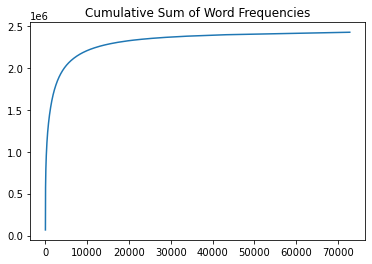

In [14]:
plt.plot(np.cumsum(a = wc_df['count']))
plt.title("Cumulative Sum of Word Frequencies")
plt.show()

In [15]:
print(np.cumsum(a = wc_df['count'])[10000])
print(np.cumsum(a = wc_df['count'])[10000]/np.sum(wc_df['count']))
wc_df.iloc[10000]

2205931
0.9099391897410428


word     grizzly
count         21
Name: 10000, dtype: object

In [16]:
wc_df.iloc[20000]

word     heighten
count           6
Name: 20000, dtype: object

### Source Specific Language

In [17]:
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
clean = pd.read_csv('../data/combined_clean_v6.csv', sep = "|")
clean['token_len'] = clean['clean'].apply(lambda x: len(str(x).split()))
clean = clean.loc[clean['token_len'] > 0]
clean = clean.loc[clean['token_len'] <= 41]
clean.reset_index(inplace = True, drop = True)

In [19]:
clean.sort_values(by = 'token_len')

source  year  \
29781   Huffington Post  2017   
186103         atlantic  2016   
164732         atlantic  2019   
176932         atlantic  2017   
68472     ABC Australia  2016   
...                 ...   ...   
155653      nottheonion  2020   
196197            onion  2018   
201351            onion  2020   
199922            onion  2019   
11877   Huffington Post  2019   

                                                    clean  is_sarcastic  \
29781                                            antilent             0   
186103                                             quoted             0   
164732                                     uncontradicted             0   
176932                                                NaN             0   
68472                                             peacock             0   
...                                                   ...           ...   
155653  parents who sued a school district after their...             0   
196197  one for the road seaworld has realized people ...             1   
201351  hawks celtics nets hornets bulls cavs mavs nug...             1   
199922  thomas jefferson the tree of liberty must be r...             1   
11877   occasionally you realize someone you thought w...             0   

        token_len  
29781           1  
186103          1  
164732          1  
176932          1  
68472           1  
...           ...  
155653         34  
196197         35  
201351         37  
199922         37  
11877          38  

[246661 rows x 5 columns]

In [20]:
clean.sample(n = 5)

source  year  \
150119         guardian  2017   
121442         guardian  2020   
36660   Huffington Post  2016   
96123               npr  2019   
133738         guardian  2019   

                                                    clean  is_sarcastic  \
150119  from trump 56 recommendations on battling opio...             0   
121442  i wanted to take action behind the wall of mom...             0   
36660   obama trump makes the case against himself eve...             0   
96123   louisianas novel subscription model for pricey...             0   
133738  critics of quantitative easing should consider...             0   

        token_len  
150119         10  
121442         13  
36660          13  
96123          11  
133738          8

In [21]:
cv = feature_extraction.text.CountVectorizer(lowercase = True,
                                             strip_accents = 'ascii',
                                             ngram_range=(1,3),
                                             stop_words="english",
                                             max_df = .8,
                                             min_df = 10, binary = True)

In [22]:
train = clean.loc[clean['year'] != 2020]
test = clean.loc[clean['year'] == 2020]

X_train = train['clean'].values.astype('U')

In [23]:
print("Fitting Count Vectorizer")
cv.fit(X_train)
X_train_cv = cv.transform(X_train)

Fitting Count Vectorizer


In [24]:
train['source'].unique()

array(['Huffington Post', 'ABC Australia', 'npr', 'guardian',
       'nottheonion', 'atlantic', 'onion', 'reductress',
       'national report', 'Hard Times', 'Fox News'], dtype=object)

In [25]:
source_specific = []
for source in train['source'].unique():
    Y_train = train['source'].apply(lambda x: 1 if x == source else 0)
    lr_cv = LogisticRegression(max_iter = 100)
    lr_cv.fit(X_train_cv, Y_train)
    
    vocab = cv.get_feature_names()
    coef_dicts = []
    for i, coef_ in enumerate(list(lr_cv.coef_[0,:])):
        coef_dict = {'word': vocab[i], 'coef': coef_}
        coef_dicts.append(coef_dict)
    coef_pd = pd.DataFrame(coef_dicts)
    source_dict = {'source': source, 'phrases': coef_pd.sort_values('coef', ascending=False)['word'][:50].values}
    source_specific.append(source_dict)

C:\ProgramData\Anaconda3\envs\term_project\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\envs\term_project\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Pro

In [26]:
source_specific

[{'source': 'Huffington Post',
  'phrases': array(['huffpollster', 'huffpost', 'gps guide', 'morning email', 'looney',
         'hilariously', 'antilgbtq', 'maher', 'news roundup', 'tweeters',
         'nsfw', 'fk', 'spoof', 'daily meditation', 'riverdale',
         'gulf crisis', 'conan', 'spoton', 'sweetest', 'queer', 'adele',
         'hidden figures', 'excop', 'gawker', 'bachelor', 'lgbtq', 'behold',
         'cooking cuff', 'snl', 'terrorist attacks', 'away murder',
         'van jones', 'walking dead', 'mindful', 'labor day', 'updated',
         'reflections', 'nightmares', 'asianamerican', 'weekend roundup',
         'colbert', 'ellen', 'suicide squad', 'hilarious', 'educator',
         'trump terrible', 'recipes', 'adorably', 'sums', 'fking'],
        dtype=object)},
 {'source': 'ABC Australia',
  'phrases': array(['planet america', 'png', 'perth', 'canberra', 'wa', 'adelaide',
         'melbourne', 'nsw', 'queensland', 'sa', 'tasmania', 'brisbane',
         'talking pictures',

Huffington Post


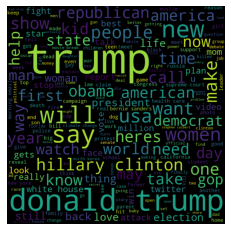

ABC Australia


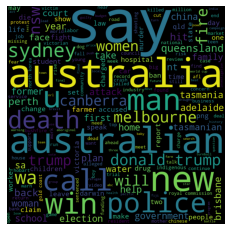

npr


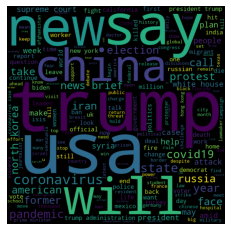

guardian


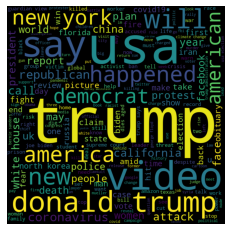

nottheonion


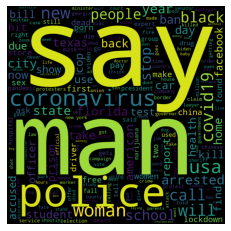

atlantic


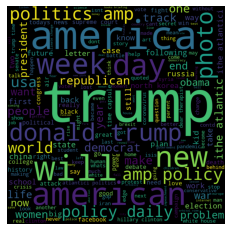

onion


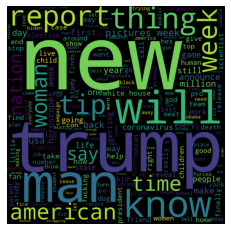

reductress


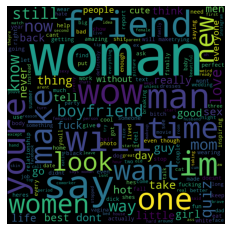

national report


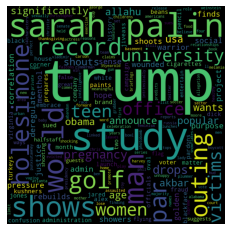

Hard Times


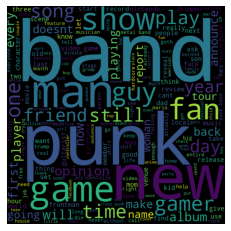

Fox News


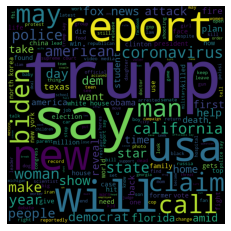

In [27]:
for source in clean['source'].unique():
    source_text = clean.loc[clean['source'] == source]['clean'].astype('U')

    wc = wordcloud.WordCloud(width = 800, height = 800).generate(" ".join(source_text))
    plt.imshow(wc)
    plt.axis("off")
    print(source)
    plt.show()